In [1]:
from eddy import detect_eddies, load_netcdf4
import matplotlib.pyplot as plt
import numpy as np

fpath = 'C:/Master/data/cmems_data/global_10km/phys_noland_001.nc'
ds,t,lon,lat,depth,uvel,vvel = load_netcdf4(fpath)

#lonDim = round(len(lon)/2)
#latDim = round(len(lat)/2)
#lon = lon[0:lonDim]
#lat = lat[0:latDim]
uvel = uvel[0,:,:] # reduce dimensions and choose which day (0)
vvel = vvel[0,:,:]  

OW, ocean_mask = detect_eddies(lon,lat,uvel,vvel) # last arg is time, only interested in one atm


--- Calculating Okubo-Weiss ---
--- Finished after 1.574283 seconds ---


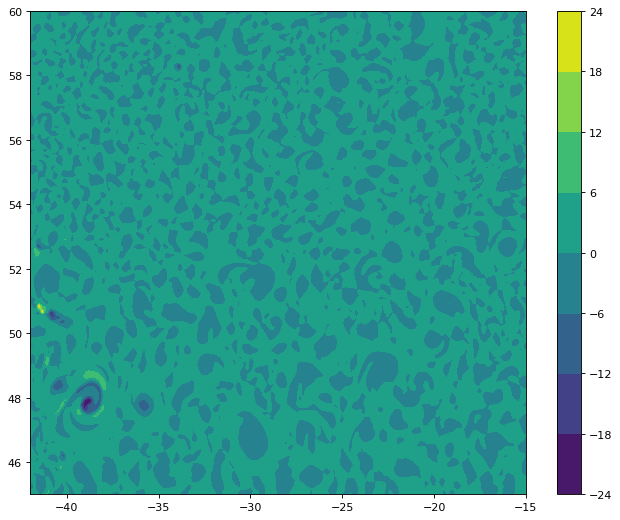

In [2]:
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w')
#levels = np.arange(-1e-9,5e-9,1e-9)

land_mask = ~ocean_mask
test = OW + OW*land_mask

plt.contourf(lon, lat, test.T)#, levels=levels)
plt.colorbar()

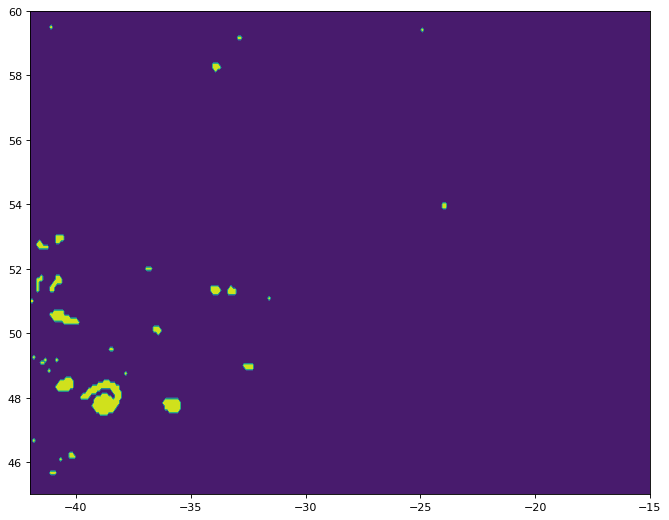

In [32]:
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w')
eddies = np.where(OW < -4, 1, 0)

# set all values like 
#eddies = eddies.filled(2000)

plt.contourf(lon, lat, eddies.T)#, levels=levels)

#plt.xlim(-16,-10)
#plt.ylim(62, 66)
#plt.xlim(-15.4,-14.6)
#plt.ylim(64, 63)

In [4]:
np.where(OW < -0.001)

(array([  0,   0,   0, ..., 324, 324, 324], dtype=int64),
 array([  2,   3,   4, ..., 177, 178, 179], dtype=int64))

In [31]:
import xarray as xr
ds = xr.Dataset({'eddies': (('latitude', 'longitude'), eddies.T)})
ds['latitude'], ds['longitude']  = lat, lon; 

#ds.rename('eddies')
ds.to_netcdf('C:/Master/data/cmems_data/global_10km/eddies_noland_001.nc')